# 1.Import the data into your colob.

In [ ]:
from google.colab import files
import io
import pandas as pd
uploaded = files.upload()

file_name = next(iter(uploaded.keys()))
print("Uploaded:", file_name)

if file_name.lower().endswith(('.csv')):
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))
elif file_name.lower().endswith(('.xlsx', '.xls')):
    df = pd.read_excel(io.BytesIO(uploaded[file_name]))
else:
    raise ValueError("Please upload a .csv or .xlsx file")
if 'Transaction Date' in df.columns:
    df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

print("Data loaded!")


Saving DATA[1].xlsx to DATA[1].xlsx
Uploaded: DATA[1].xlsx
Data loaded!


# 2.	Display the first five records

In [ ]:
# The first 5 rows
df.head()


Transaction ID       Item Quantity Unit Price Total Amount    Payment Mode  \
0    TXN_1961373  Cappucino        2          2            4     Credit Card   
1    TXN_4977031   Pastries        4          3           12            Cash   
2    TXN_4271903   Cookiees        4          1        ERROR     Credit Card   
3    TXN_7034554    Muffins        2          5           10         UNKNOWN   
4    TXN_3160411  Cappucino        2          2            4  Digital Wallet   

      Location Transaction Date  
0     Takeaway       2024-08-09  
1  Store-Visit       2024-05-16  
2  Store-Visit       2024-07-19  
3      UNKNOWN       2024-04-27  
4  Store-Visit       2024-11-06

# 3.	Display the last five records

In [ ]:
# The last 5 rows
df.tail()


Transaction ID       Item Quantity Unit Price Total Amount  \
9995    TXN_7672686  Cappucino        2          2            4   
9996    TXN_9659401        NaN        3        NaN            3   
9997    TXN_5255387  Cappucino        4          2            8   
9998    TXN_7695629   Cookiees        3        NaN            3   
9999    TXN_6170729     Donuts        3          4           12   

        Payment Mode     Location Transaction Date  
9995             NaN      UNKNOWN       2024-08-30  
9996  Digital Wallet          NaN       2024-02-06  
9997  Digital Wallet          NaN       2024-02-03  
9998  Digital Wallet          NaN       2024-02-12  
9999            Cash  Store-Visit       2024-07-11

# 4.	Display the shape & size of the Dataset

In [ ]:
# Shape = (rows, columns)
rows, cols = df.shape
print(f"Shape: {df.shape}  ->  Rows: {rows}, Columns: {cols}")

# Size = total number of cells (rows * columns)
print("Size (total cells):", df.size)


Shape: (10000, 8)  ->  Rows: 10000, Columns: 8
Size (total cells): 80000


# Showing column names

In [ ]:
print(df.columns.tolist())


['Transaction ID', 'Item', 'Quantity', 'Unit Price', 'Total Amount', 'Payment Mode', 'Location', 'Transaction Date']


# 5.	Find the unique items in the dataset?

In [ ]:
import numpy as np
import pandas as pd

df_clean = df.copy()

df_clean.columns = [c.strip() for c in df_clean.columns]

for c in df_clean.select_dtypes(include=['object']).columns:
    df_clean[c] = df_clean[c].astype(str).str.strip()
    df_clean[c] = df_clean[c].replace({'': np.nan, 'nan': np.nan, 'None': np.nan})

if 'Transaction Date' in df_clean.columns:
    df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'], errors='coerce')

for c in ['Quantity', 'Unit Price', 'Total Amount']:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')

if 'Quantity' in df_clean.columns:
    df_clean.loc[df_clean['Quantity'] <= 0, 'Quantity'] = np.nan
if 'Unit Price' in df_clean.columns:
    df_clean.loc[df_clean['Unit Price'] <= 0, 'Unit Price'] = np.nan
if 'Total Amount' in df_clean.columns:
    df_clean.loc[df_clean['Total Amount'] < 0, 'Total Amount'] = np.nan

mask_total_missing = (
    df_clean['Total Amount'].isna() &
    df_clean['Quantity'].notna() &
    df_clean['Unit Price'].notna()
)
df_clean.loc[mask_total_missing, 'Total Amount'] = (
    df_clean.loc[mask_total_missing, 'Quantity'] *
    df_clean.loc[mask_total_missing, 'Unit Price']
)

mask_q_missing = (
    df_clean['Quantity'].isna() &
    df_clean['Unit Price'].notna() &
    df_clean['Total Amount'].notna() &
    (df_clean['Unit Price'] != 0)
)
df_clean.loc[mask_q_missing, 'Quantity'] = (
    df_clean.loc[mask_q_missing, 'Total Amount'] /
    df_clean.loc[mask_q_missing, 'Unit Price']
)

mask_p_missing = (
    df_clean['Unit Price'].isna() &
    df_clean['Quantity'].notna() &
    df_clean['Total Amount'].notna() &
    (df_clean['Quantity'] != 0)
)
df_clean.loc[mask_p_missing, 'Unit Price'] = (
    df_clean.loc[mask_p_missing, 'Total Amount'] /
    df_clean.loc[mask_p_missing, 'Quantity']
)

df_clean = df_clean.dropna(subset=['Item'])
df_clean = df_clean.dropna(subset=['Total Amount'])

for c in ['Payment Mode', 'Location']:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].fillna('Unknown')

df_time = df_clean.dropna(subset=['Transaction Date']).copy()

print(" Cleaning complete. Rows remaining:", len(df_clean))

 Cleaning complete. Rows remaining: 9628


# 6.	Handle the missing values in the dataset?

In [ ]:
df_clean


Transaction ID       Item  Quantity  Unit Price  Total Amount  \
0       TXN_1961373  Cappucino       2.0         2.0           4.0   
1       TXN_4977031   Pastries       4.0         3.0          12.0   
2       TXN_4271903   Cookiees       4.0         1.0           4.0   
3       TXN_7034554    Muffins       2.0         5.0          10.0   
4       TXN_3160411  Cappucino       2.0         2.0           4.0   
...             ...        ...       ...         ...           ...   
9994    TXN_7851634    UNKNOWN       4.0         4.0          16.0   
9995    TXN_7672686  Cappucino       2.0         2.0           4.0   
9997    TXN_5255387  Cappucino       4.0         2.0           8.0   
9998    TXN_7695629   Cookiees       3.0         1.0           3.0   
9999    TXN_6170729     Donuts       3.0         4.0          12.0   

        Payment Mode     Location Transaction Date  
0        Credit Card     Takeaway       2024-08-09  
1               Cash  Store-Visit       2024-05-16  
2        Credit Card  Store-Visit       2024-07-19  
3            UNKNOWN      UNKNOWN       2024-04-27  
4     Digital Wallet  Store-Visit       2024-11-06  
...              ...          ...              ...  
9994         Unknown      Unknown       2024-08-01  
9995         Unknown      UNKNOWN       2024-08-30  
9997  Digital Wallet      Unknown       2024-02-03  
9998  Digital Wallet      Unknown       2024-02-12  
9999            Cash  Store-Visit       2024-07-11  

[9628 rows x 8 columns]

# 7.	Calculate the total sales.

In [ ]:
# Calculate total sales
total_sales = df_clean['Total Amount'].sum()

print(f" Total Sales: {total_sales:,.2f}")


 Total Sales: 85,962.00


# 8.	Calculate the average unit price

In [ ]:
# Calculate the average unit price
avg_unit_price = df_clean['Unit Price'].mean()

print(f" Average Unit Price: {avg_unit_price:,.2f}")


 Average Unit Price: 2.95


# 9.	Total Sales per item

In [ ]:
# Total Sales per Item
sales_per_item = (
    df_clean.groupby('Item')['Total Amount']
    .sum()
    .sort_values(ascending=False)   # sort from highest to lowest
)

print("Total Sales per Item:")
print(sales_per_item)


Total Sales per Item:
Item
Muffins         17320.0
Donuts          13664.0
Bread Sticks    13320.0
Desserts        10509.0
Pastries        10395.0
Cappucino        7062.0
Tea              4951.5
Cookiees         3223.0
UNKNOWN          2929.5
ERROR            2588.0
Name: Total Amount, dtype: float64


# 10.	Average unit price per item

In [ ]:
# Average Unit Price per Item
avg_price_per_item = (
    df_clean.groupby('Item')['Unit Price']
    .mean()
    .sort_values(ascending=False)   # sort from highest to lowest
)

print(" Average Unit Price per Item:")
print(avg_price_per_item)


 Average Unit Price per Item:
Item
Muffins         5.000000
Bread Sticks    4.000000
Donuts          4.000000
Pastries        3.000000
Desserts        3.000000
ERROR           2.917241
UNKNOWN         2.900585
Cappucino       2.000000
Tea             1.500000
Cookiees        1.000000
Name: Unit Price, dtype: float64


# 11.	Number of transactions per item

In [ ]:
# Number of Transactions per Item
transactions_per_item = (
    df_clean.groupby('Item')['Transaction ID']
    .count()
    .sort_values(ascending=False)   # sort from highest to lowest
)

print("Number of Transactions per Item:")
print(transactions_per_item)


Number of Transactions per Item:
Item
Desserts        1167
Cappucino       1159
Muffins         1145
Pastries        1137
Donuts          1123
Bread Sticks    1091
Cookiees        1087
Tea             1085
UNKNOWN          343
ERROR            291
Name: Transaction ID, dtype: int64


# 12.	Display top 5 items with total sales

In [ ]:
# Top 5 items with Total Sales
top5_items = (
    df_clean.groupby('Item')['Total Amount']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print(" Top 5 Items by Total Sales:")
print(top5_items)


 Top 5 Items by Total Sales:
Item
Muffins         17320.0
Donuts          13664.0
Bread Sticks    13320.0
Desserts        10509.0
Pastries        10395.0
Name: Total Amount, dtype: float64


# 13.	Display the 2nd highest sales item

In [ ]:
# 2nd Highest Sales Item
sales_by_item = (
    df_clean.groupby('Item')['Total Amount']
    .sum()
    .sort_values(ascending=False)
)

second_highest = sales_by_item.iloc[1]   # get 2nd item
second_highest_item = sales_by_item.index[1]

print("2nd Highest Sales Item:")
print(f"{second_highest_item} → {second_highest}")


2nd Highest Sales Item:
Donuts → 13664.0


# 15.	Count the number of transactions for each Payment Method

In [ ]:
transactions_per_payment = (
    df.groupby('Payment Mode')['Transaction ID']
    .count()
    .sort_values(ascending=False)
)

print(transactions_per_payment)


Payment Mode
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: Transaction ID, dtype: int64


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving DATA[1].xlsx to DATA[1] (1).xlsx


In [ ]:
df = pd.read_excel("DATA[1].xlsx")
print(df.head())   # first 5 rows
print(df.info())


  Transaction ID       Item Quantity Unit Price Total Amount    Payment Mode  \
0    TXN_1961373  Cappucino        2          2            4     Credit Card   
1    TXN_4977031   Pastries        4          3           12            Cash   
2    TXN_4271903   Cookiees        4          1        ERROR     Credit Card   
3    TXN_7034554    Muffins        2          5           10         UNKNOWN   
4    TXN_3160411  Cappucino        2          2            4  Digital Wallet   

      Location     Transaction Date  
0     Takeaway  2024-08-09 00:00:00  
1  Store-Visit  2024-05-16 00:00:00  
2  Store-Visit  2024-07-19 00:00:00  
3      UNKNOWN  2024-04-27 00:00:00  
4  Store-Visit  2024-11-06 00:00:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object


# 16.	Calculate the total Sales for each Payment Method

In [ ]:
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')

total_sales_payment = df.groupby('Payment Mode')['Total Amount'].sum()
print(total_sales_payment)


Payment Mode
Cash              19326.0
Credit Card       19599.0
Digital Wallet    19578.0
ERROR              2453.5
UNKNOWN            2325.0
Name: Total Amount, dtype: float64


In [ ]:
print(df['Total Amount'].dtype)  # shows current datatype
print(df['Total Amount'].head()) # see sample values


float64
0     4.0
1    12.0
2     NaN
3    10.0
4     4.0
Name: Total Amount, dtype: float64


# 17.	Count the number of transactions for each Payment Method

In [ ]:
transactions_per_payment = (
    df.groupby('Payment Mode')['Transaction ID']
      .count()
      .sort_values(ascending=False)
)

print(transactions_per_payment)


Payment Mode
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: Transaction ID, dtype: int64


# 18.	Calculate the total sales for each payment Method

In [ ]:

df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')

total_sales_payment = (
    df.groupby('Payment Mode')['Total Amount']
      .sum()
      .sort_values(ascending=False)
)

print("Total Sales for each Payment Method:")
print(total_sales_payment)


Total Sales for each Payment Method:
Payment Mode
Credit Card       19599.0
Digital Wallet    19578.0
Cash              19326.0
ERROR              2453.5
UNKNOWN            2325.0
Name: Total Amount, dtype: float64


# 19.	Which item has highest sales and lowest sales

In [ ]:
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')

sales_per_item = df.groupby('Item')['Total Amount'].sum()

highest_sales_item = sales_per_item.idxmax()
highest_sales_value = sales_per_item.max()

lowest_sales_item = sales_per_item.idxmin()
lowest_sales_value = sales_per_item.min()

print("Item with Highest Sales:", highest_sales_item, "→", highest_sales_value)
print("Item with Lowest Sales:", lowest_sales_item, "→", lowest_sales_value)


Item with Highest Sales: Muffins → 16605.0
Item with Lowest Sales: ERROR → 2453.5


## 20.	Create a Stacked Bar chart which show the breakdown of sales by item within each payment method

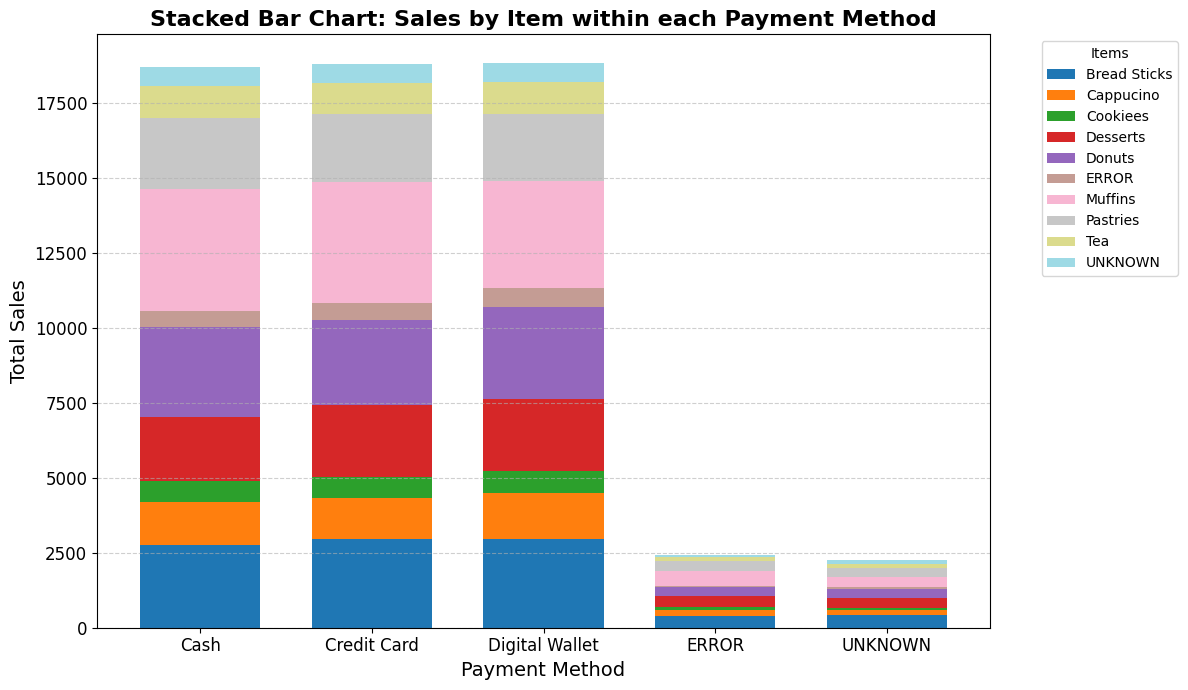

In [ ]:
import matplotlib.pyplot as plt
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')
sales_breakdown = df.pivot_table(
    index='Payment Mode',
    columns='Item',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)

sales_breakdown.plot(kind='bar', stacked=True, figsize=(12,7),colormap='tab20',width=0.7)

plt.title("Stacked Bar Chart: Sales by Item within each Payment Method",fontsize=16, fontweight="bold")
plt.xlabel("Payment Method", fontsize=14)
plt.ylabel("Total Sales",fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Items", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


# 21.	Create the bar chart compare the total sales for different items

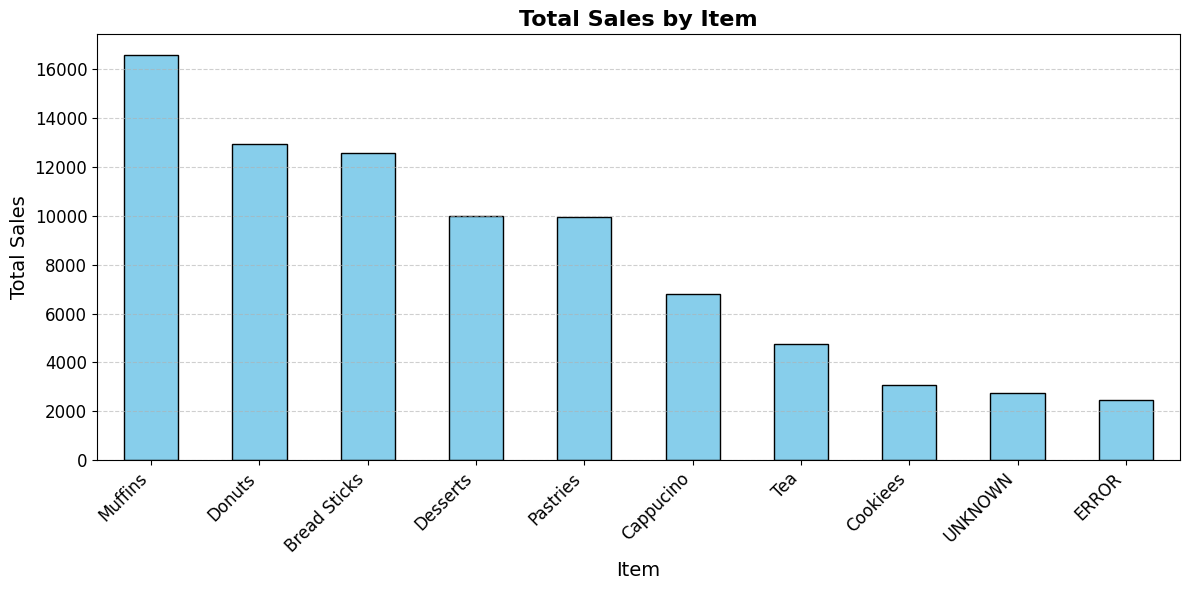

In [ ]:
import matplotlib.pyplot as plt

item_sales = df.groupby("Item")["Total Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
item_sales.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Total Sales by Item", fontsize=16, fontweight="bold")
plt.xlabel("Item", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Read it directly from uploaded dictionary
import io
df = pd.read_excel(io.BytesIO(uploaded["DATA[1].xlsx"]))

# Now df is ready
print(df.head())


Saving DATA[1].xlsx to DATA[1] (2).xlsx


KeyError: 'DATA[1].xlsx'

In [ ]:
df["Total Amount", "Total Sales"] = pd.to_numeric(df["Total Amount", "Total Sales"], errors="coerce")
df = df.dropna(subset=["Total Amount", "Total Sales"])
item_sales = df.groupby("Item")["Total Amount",].sum()
print(item_sales)


# 22.	Create a pie chart of sales by each item

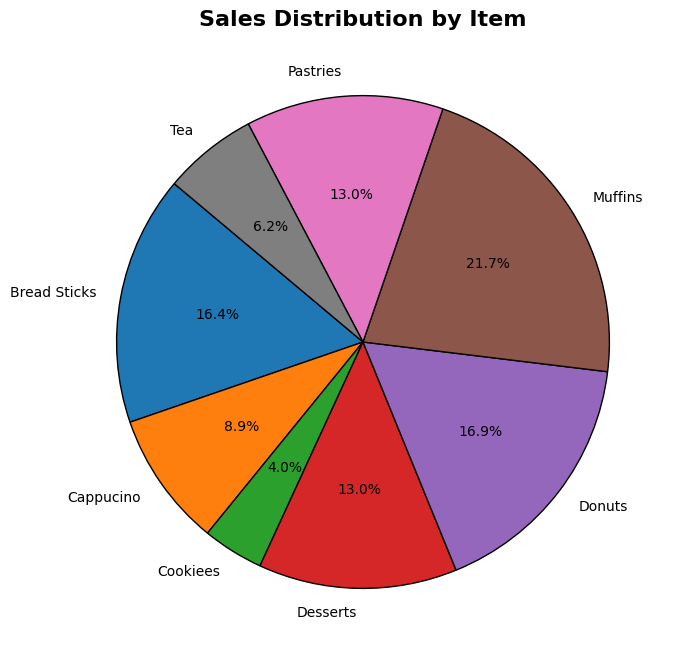

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("DATA[1].xlsx")

df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')

df = df[~df["Item"].isin(["UNKNOWN", "ERROR"])]
df = df.dropna(subset=['Total Amount'])

item_sales = df.groupby("Item")["Total Amount"].sum()

plt.figure(figsize=(8,8))
plt.pie(
    item_sales,
    labels=item_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor':'black'}
)

plt.title("Sales Distribution by Item", fontsize=16, fontweight="bold")
plt.show()

# 23.	Create a line chart by total sales over transaction date

/tmp/ipython-input-2540494900.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M", on="Transaction Date")["Total Amount"].sum().reset_index()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

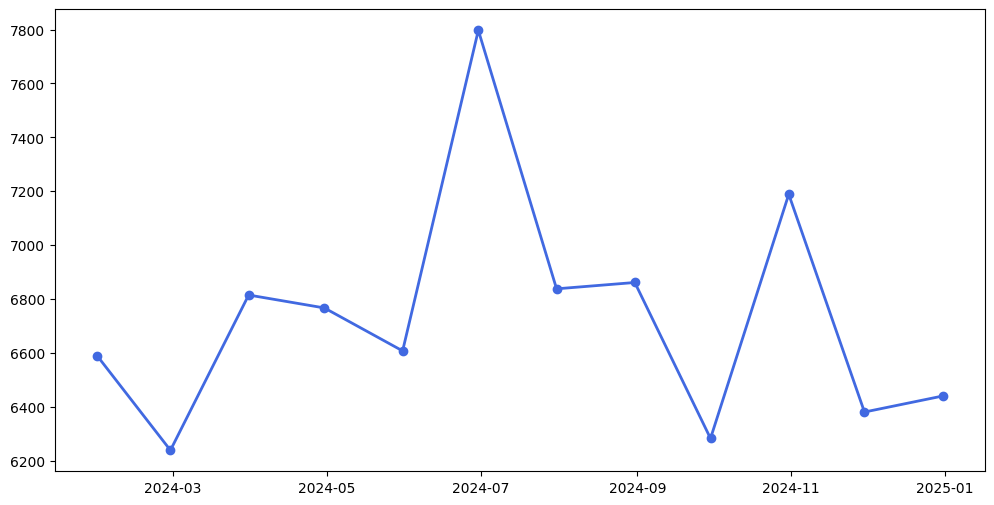

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("DATA[1].xlsx")

df["Total Amount"] = (
    df["Total Amount"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
)
df["Total Amount"] = pd.to_numeric(df["Total Amount"], errors="coerce")
df = df.dropna(subset=["Total Amount"])

df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

monthly_sales = (
    df.resample("M", on="Transaction Date")["Total Amount"].sum().reset_index()
)

plt.figure(figsize=(12,6))
plt.plot(monthly_sales["Transaction Date"], monthly_sales["Total Amount"],
         marker="o", linestyle="-", color="royalblue", linewidth=2, markersize=6)

plt


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel("DATA[1].xlsx")   # e.g., DATA.xlsx or DATA[1].xlsx


Saving DATA[1].xlsx to DATA[1] (4).xlsx


In [ ]:
# Convert numeric columns
df["Total Amount"] = pd.to_numeric(df["Total Amount"], errors="coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")

# Convert Date
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# Drop missing values in important columns
df = df.dropna(subset=["Total Amount", "Quantity", "Transaction Date"])


# 24.	By using the graphs and Correlation matrix give the suggestions to improve the Coffee shop sales

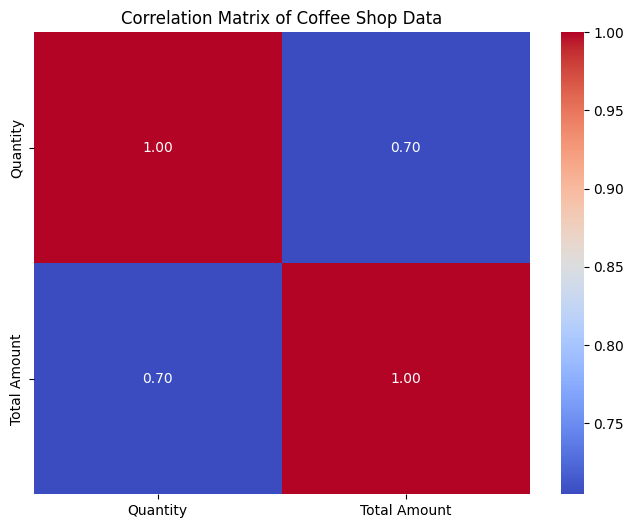

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Coffee Shop Data")
plt.show()


📌 Suggestions to Improve Coffee Shop Sales:

 ✅ Encourage bulk purchases through combo offers and loyalty rewards.
 ⚠️ Discounts show weak impact. Focus on limited-time or targeted discounts.
 🚚 Faster delivery is linked to higher sales. Optimize preparation and delivery speed.
 ☕ The 'Beverages' category sells the most. Promote it with complementary products.
